## Implement CNN Fundamentals on MNIST Dataset Using Pytorch

In [1]:
# Import the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [3]:
train_dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
len(train_dataset)

60000

In [5]:
len(train_dataset)/64 # 64 is batch size

937.5

In [6]:

class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        # Convulation Layer
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3) # (channels, filters, kernel_size)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)

        # Fully Connected Layer
        self.fcl1 = nn.Linear(64*5*5, 128)
        self.fcl2 = nn.Linear(128, 84)
        self.fcl3 = nn.Linear(84, 10) # 10 output class for MNIST

    def forward(self, x):
        # Pass the input image through convoulation layers
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)

        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)

        # Flatten the output of the convolutional layers
        x = x.view(x.size(0), -1)
        
        x = self.fcl1(x)
        x = nn.ReLU()(x)
        
        x = self.fcl2(x)
        x = nn.ReLU()(x)
        
        x = self.fcl3(x)

        return F.softmax(x, dim=1)
        

In [7]:
# Initialize the model
model = CNN()

In [8]:
# Define the loss function and optimizer
model = CNN()
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
# Define the accuracy function
def accuracy_fn(y_truth, y_pred):
    correct = torch.eq(y_truth, y_pred).sum().item()
    accuracy = (correct/len(y_truth))*100
    return accuracy

In [10]:
# Train and test loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [11]:
len(train_loader)

938

In [12]:
len(test_loader)

157

In [13]:
# Train the Model
model.train()
epochs = 10

for epoch in range(epochs):
    running_loss = 0.0
    acc = 0
    
    for data in train_loader:
        X_train, y_train = data
        
        optimizer.zero_grad()
        
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        accuracy = accuracy_fn(y_truth=y_train, y_pred=torch.argmax(y_pred, dim=1))
        
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        acc += accuracy


    print(f"Epoch: {epoch+1}, Loss: {running_loss/len(train_loader)}, Accuracy: {acc/len(train_loader)}")
    # print(f"Epoch: {epoch+1}, Loss: {running_loss/len(train_loader)}")
        

Epoch: 1, Loss: 1.5936120537552498, Accuracy: 87.28178304904051
Epoch: 2, Loss: 1.491485207955212, Accuracy: 97.05157249466951
Epoch: 3, Loss: 1.4834007508973324, Accuracy: 97.83282249466951
Epoch: 4, Loss: 1.4787011601523297, Accuracy: 98.29757462686567
Epoch: 5, Loss: 1.4757164555317812, Accuracy: 98.58242270788912
Epoch: 6, Loss: 1.4746210268819764, Accuracy: 98.65571695095949
Epoch: 7, Loss: 1.4745380964868866, Accuracy: 98.67404051172709
Epoch: 8, Loss: 1.4734844112955432, Accuracy: 98.78231609808103
Epoch: 9, Loss: 1.4714411641997316, Accuracy: 98.97554637526652
Epoch: 10, Loss: 1.4712360841887338, Accuracy: 99.00053304904051


In [14]:

# Test / Evaluate the Model
model.eval()

test_loss = 0
test_accuracy = 0

with torch.inference_mode():
    for data in test_loader:
        X_test, y_test = data

        y_pred = model(X_test)
        loss = loss_fn(y_pred, y_test)
        accuracy = accuracy_fn(y_truth=y_test, y_pred=torch.argmax(y_pred, dim=1))
        
        test_loss += loss.item()
        test_accuracy += accuracy

print(f"Test Loss: {test_loss/len(test_loader)}, Test Accuracy: {test_accuracy/len(test_loader)}")
          

Test Loss: 1.4760170195512712, Test Accuracy: 98.51711783439491


In [15]:
# Now predict an image, using this model
from PIL import Image
import matplotlib.pyplot as plt

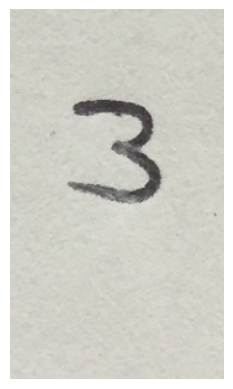

In [16]:
image_path = 'artifacts/hw_number.png'
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

In [17]:
gray_image = image.convert('L') # Convert to grayscale

preprocess = transforms.Compose([
    transforms.Resize((28,28)), # Resize same as to MNIST image
    transforms.ToTensor() # Convert in tensor format
])

image = preprocess(gray_image).unsqueeze(0) # Add a batch dimension

# Make prediction
model.eval()

with torch.inference_mode():
    class_probabilities = model(image)

# Interpret the predictions
predicted_label = torch.argmax(class_probabilities, dim=1).item()

print('Predicted Label: ', predicted_label)

Predicted Label:  0


In [18]:
class_probabilities

tensor([[9.8422e-01, 2.1479e-06, 7.6198e-06, 4.7011e-09, 1.4556e-04, 9.5982e-08,
         2.6214e-04, 1.5366e-02, 2.6037e-07, 1.3588e-07]])